In [ ]:
#Problem Statement:
#Prodigy University is seeking to enhance its enrollment process. They plan to do so by implementing a predictive analytics model aimed at identifying prospective students who demonstrate a high potential for academic success. 
#The goal is to develop a predictive model that can accurately forecast the first-year college GPA of applicants based on their SAT scores and high school scores. This model is intended to serve as a strategic tool for the admissions office, enabling them to efficiently shortlist candidates who not only meet the academic standards of the university but are also likely to thrive in their chosen fields of study. By doing so, the university aspires to optimize its student selection process, improve academic outcomes, and foster an environment of excellence and high achievement.
#Using ANN Find:
#1)Linear Regression to predict the first year college grades of students from their high school SAT and GPA scores.
#2)Find all types of Gradient descent values.
#3)Find all Optimization Techniques values.


In [56]:
#import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

In [57]:
# WE WILL LOAD THE DATASET 
df=pd.read_csv('Prodigy University Dataset.csv')
df

,sat_sum,hs_gpa,fy_gpa
0,508,3.40,3.18
1,488,4.00,3.33
2,464,3.75,3.25
3,380,3.75,2.42
4,428,4.00,2.63
...,...,...,...
995,400,3.70,2.19
996,432,3.30,1.50
997,456,3.50,3.17
998,480,2.30,1.94


In [58]:
# Features (X) and target (y)
X = df[['sat_sum', 'hs_gpa']]
y = df['fy_gpa']

In [59]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# --- Linear Regression Model ---
lr_model = LinearRegression()#Creates a linear regression model.
lr_model.fit(X_train, y_train)#Trains the model on training data.
y_pred_lr = lr_model.predict(X_test)#Predicts FY GPA for test data.

In [61]:
# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")
print(f"Coefficients: SAT_sum = {lr_model.coef_[0]:.4f}, HS_GPA = {lr_model.coef_[1]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

Linear Regression - MSE: 0.3963, R²: 0.3311
Coefficients: SAT_sum = 0.0037, HS_GPA = 0.5815
Intercept: -0.9166


In [62]:
# Normalize the features for ANN (neural networks work better with scaled data)
X_train_scaled = (X_train - X_train.mean()) / X_train.std()#scales the data so SAT scores
X_test_scaled = (X_test - X_train.mean()) / X_train.std()

In [63]:
# Define a simple ANN model
def build_ann(optimizer):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(2,)),  # Hidden layer with 16 neurons
        Dense(8, activation='relu'),                    # Hidden layer with 8 neurons
        Dense(1)                                        # Output layer (no activation for regression)
    ])
    model.compile(optimizer=optimizer, loss='mse')      # Mean squared error as loss
    return model

In [64]:
gradient_descents = {
    'Batch': {'batch_size': len(X_train_scaled), 'optimizer': SGD(learning_rate=0.01), 'desc': 'Batch Gradient Descent'},
    'SGD': {'batch_size': 1, 'optimizer': SGD(learning_rate=0.01), 'desc': 'Stochastic Gradient Descent'},#Updates weights after every single data point
    'Mini-Batch': {'batch_size': 32, 'optimizer': SGD(learning_rate=0.01), 'desc': 'Mini-Batch Gradient Descent'},
    'Adam': {'batch_size': 32, 'optimizer': Adam(learning_rate=0.001), 'desc': 'Adam Optimizer'}#Combines momentum and RMSprop.
}


In [65]:
results = {}
histories = {}

In [66]:
# Train and evaluate ANN for each configuration
for gd_type, config in gradient_descents.items():
    print(f"\nTraining with {config['desc']}...")


Training with Batch Gradient Descent...

Training with Stochastic Gradient Descent...

Training with Mini-Batch Gradient Descent...

Training with Adam Optimizer...


In [67]:
# Build the model with the specified optimizer
model = build_ann(config['optimizer'])

C:\Users\VANSHIKA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
# Train the model
history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=config['batch_size'],
        validation_split=0.2,
        verbose=0  # Silent training
    )

In [69]:
# Predict on test set
y_pred_ann = model.predict(X_test_scaled, verbose=0)
    
# Evaluate
mse = mean_squared_error(y_test, y_pred_ann)
r2 = r2_score(y_test, y_pred_ann)
results[gd_type] = {'MSE': mse, 'R²': r2}
histories[gd_type] = history.history
    
print(f"{config['desc']} - MSE: {mse:.4f}, R²: {r2:.4f}")

Adam Optimizer - MSE: 0.4001, R²: 0.3247


C:\Users\VANSHIKA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


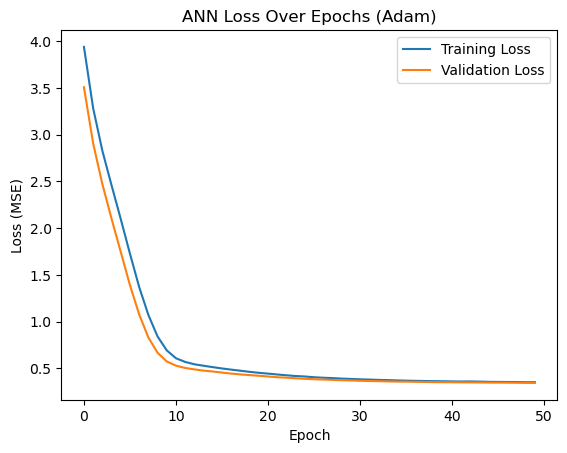

In [74]:
#Plot training loss for one optimizer (e.g., Adam)
ann_model = build_ann(Adam(learning_rate=0.001))
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, 
                       validation_split=0.2, verbose=0)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss Over Epochs (Adam)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()